# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import gensim
import pickle 
import os 

In [2]:
def save_model(classifier):
    save_classifier = open("topicModel14.pickle","wb") #binary write
    pickle.dump(classifier, save_classifier)
    save_classifier.close()

def docs2vecs(docs, dictionary):
    # docs is a list of documents returned by corpus2docs.
    # dictionary is a gensim.corpora.Dictionary object.
    vecs1 = [dictionary.doc2bow(doc) for doc in docs]
    return vecs1

    
def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()
    print (len(corpus))
    print (len(data))
    print (len(ldamodel[corpus]))

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        # row = sorted(row, key=lambda x: (x[1]))
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        sent_topics_df = sent_topics_df.append(pd.Series([round(row[0][1],4),round(row[1][1],4),round(row[2][1],4),round(row[3][1],4),round(row[4][1],4),round(row[5][1],4),round(row[6][1],4),round(row[7][1],4),round(row[8][1],4),round(row[9][1],4),round(row[10][1],4),round(row[11][1],4),round(row[12][1],4),round(row[13][1],4)]), ignore_index=True)
        print(i)

    sent_topics_df.columns = ['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4','Topic 5', 'Topic 6','Topic 7','Topic 8','Topic 9','Topic 10','Topic 11','Topic 12','Topic 13']
       
    # Add original text to the end of the output
    data_sentence = [' '.join(w) for w in data]
    contents = pd.Series(data_sentence)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
    


In [3]:
df = pd.read_excel("sample_data/common_df_20k.xlsx")
news = df['text']

stop_word_list = ["reuter"]

news_docs = [[w for w in new.split() if w not in stop_word_list] for new in news ]
print (len(news_docs))
news_dictionary = gensim.corpora.Dictionary(news_docs)
print (news_dictionary)
news_vecs = docs2vecs(news_docs, news_dictionary)

20993
Dictionary(74052 unique tokens: ['a', 'abil', 'abl', 'accept', 'access']...)


In [4]:
df.head()

,Unnamed: 0,title,text,label,index
0,8003,senat bill would count muni toward bank liquid,bond sold u s state citi school issuer municip...,1,8003
1,6254,germani reach trump govern keep good tie merke...,germani want reach futur u s administr presid ...,1,6254
2,11307,turkey review case link app use coup suspect,turkish prosecutor said wednesday review legal...,1,11307
3,47586,thing watch tonight gop debat,kill obama administr rule dismantl obamacar pu...,1,47586
4,14941,activist appeal new south african nuclear plan...,greenpeac africa ngo intend appeal south afric...,1,14941


In [11]:
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})
mallet_path = r'C:\\mallet-2.0.8\\bin\\mallet'

2021-03-27 16:19:35.493162
#Topics: 2 Score: 0.42992305433656963
#Topics: 4 Score: 0.44883665737145856
#Topics: 6 Score: 0.4627433617928785
#Topics: 8 Score: 0.49014018206027926
#Topics: 10 Score: 0.4956039870431746
#Topics: 12 Score: 0.5176281285546166
#Topics: 14 Score: 0.5253508638016018
#Topics: 16 Score: 0.5044869247327943
#Topics: 18 Score: 0.5195463431481333
2021-03-27 16:39:52.134808


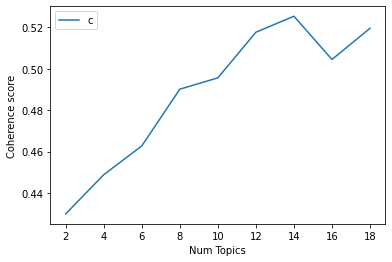

In [7]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 20, 2):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    sg_lda_x = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=news_vecs, num_topics=num_topics, id2word=news_dictionary)
    coherencemodel = CoherenceModel(model=sg_lda_x, texts=news_docs, dictionary=news_dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(sg_lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

# Show graph

import matplotlib.pyplot as plt

limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
no_topics=8

# mallet_path = r"C://mallet-2.0.8/bin/mallet" # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=news_vecs, num_topics=no_topics, id2word=news_dictionary)


In [9]:
vecTop = ldamallet.show_topics()
topics = []
for i in range(0, no_topics):
    top10values = vecTop[i][1]
    topics.append([val.split('*')[1] for val in top10values.split('+')])

In [10]:
for t in topics:
    print (t)

['"report" ', '"clinton" ', '"investig" ', '"email" ', '"depart" ', '"inform" ', '"offic" ', '"case" ', '"fbi" ', '"offici"']
['"polic" ', '"attack" ', '"group" ', '"state" ', '"kill" ', '"citi" ', '"forc" ', '"peopl" ', '"muslim" ', '"islam"']
['"trump" ', '"donald" ', '"imag" ', '"peopl" ', '"twitter" ', '"presid" ', '"white" ', '"featur" ', '"news" ', '"video"']
['"govern" ', '"court" ', '"parti" ', '"year" ', '"rule" ', '"countri" ', '"polit" ', '"leader" ', '"elect" ', '"minist"']
['"state" ', '"unit" ', '"presid" ', '"trump" ', '"north" ', '"russia" ', '"foreign" ', '"china" ', '"offici" ', '"countri"']
['"year" ', '"tax" ', '"million" ', '"state" ', '"bill" ', '"hous" ', '"plan" ', '"fund" ', '"compani" ', '"percent"']
['"trump" ', '"republican" ', '"democrat" ', '"clinton" ', '"campaign" ', '"elect" ', '"vote" ', '"senat" ', '"candid" ', '"support"']
['"peopl" ', '"american" ', '"time" ', '"world" ', '"thi" ', '"black" ', '"mani" ', '"school" ', '"live" ', '"year"']


- Hillary Email Scandal
- Immigration law under Obama's presidency
- Black lives matter
- Protest against police's racism from Muslim groups 
- President Donald Trump Twitter
- China's role?
- Business Taxes
- Election Campaigns

In [12]:
no_topics=14

# mallet_path = r"C://mallet-2.0.8/bin/mallet" # update this path

ldamallet14 = gensim.models.wrappers.LdaMallet(mallet_path, corpus=news_vecs, num_topics=no_topics, id2word=news_dictionary)
save_model(ldamallet14)
    
classifier_saved = open("topicModel14.pickle", "rb") #binary read
classifier_load = pickle.load(classifier_saved)
classifier_saved.close()

vecTop14 = classifier_load.show_topics(14)
topics14 = []
for i in range(0, no_topics):
    top10values14 = vecTop14[i][1]
    topics14.append([val.split('*')[1] for val in top10values14.split('+')])

for t in topics14:
    print (t)

['"women" ', '"black" ', '"year" ', '"school" ', '"famili" ', '"time" ', '"student" ', '"woman" ', '"man" ', '"children"']
['"trump" ', '"presid" ', '"donald" ', '"obama" ', '"white" ', '"hous" ', '"campaign" ', '"american" ', '"call" ', '"support"']
['"million" ', '"year" ', '"tax" ', '"compani" ', '"percent" ', '"busi" ', '"money" ', '"billion" ', '"fund" ', '"pay"']
['"imag" ', '"twitter" ', '"peopl" ', '"featur" ', '"news" ', '"thing" ', '"video" ', '"watch" ', '"thi" ', '"media"']
['"clinton" ', '"investig" ', '"report" ', '"email" ', '"inform" ', '"fbi" ', '"hillari" ', '"offici" ', '"russian" ', '"russia"']
['"republican" ', '"senat" ', '"hous" ', '"bill" ', '"democrat" ', '"obama" ', '"congress" ', '"plan" ', '"presid" ', '"legisl"']
['"polic" ', '"peopl" ', '"attack" ', '"protest" ', '"kill" ', '"offic" ', '"muslim" ', '"gun" ', '"citi" ', '"group"']
['"american" ', '"peopl" ', '"world" ', '"polit" ', '"america" ', '"thi" ', '"mani" ', '"time" ', '"make" ', '"media"']
['"state

- Equality
- US White House
- Taxes
- Twitter
- Hillary Clinton’s Email Scandal
- US Bills
- Protest
- America for Americans
- Nuclear Bomb
- US Legislation
- Sustainability
- EU
- Terrorism
- US Elections. 

In [13]:
#Find most dominant topic



classifier_saved = open("topicModel14.pickle", "rb") #binary read
classifier_load = pickle.load(classifier_saved)
classifier_saved.close()


df_topic_sents_keywords = format_topics_sentences(ldamodel=classifier_load, corpus=news_vecs, data=news_docs)

# Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
df_topic_sents_keywords.columns = ['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4','Topic 5', 'Topic 6','Topic 7','Topic 8','Topic 9','Topic 10','Topic 11','Topic 12','Topic 13','Text']

# Show
df_topic_sents_keywords.head(10)


9
17660
17661
17662
17663
17664
17665
17666
17667
17668
17669
17670
17671
17672
17673
17674
17675
17676
17677
17678
17679
17680
17681
17682
17683
17684
17685
17686
17687
17688
17689
17690
17691
17692
17693
17694
17695
17696
17697
17698
17699
17700
17701
17702
17703
17704
17705
17706
17707
17708
17709
17710
17711
17712
17713
17714
17715
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Text
0,0.0399,0.0240,0.3892,0.0195,0.0369,0.1520,0.0315,0.0265,0.0619,0.0753,0.0549,0.0325,0.0275,0.0285,bond sold u s state citi school issuer municip...
1,0.0431,0.0777,0.0945,0.0389,0.0620,0.0620,0.0421,0.0400,0.1018,0.0421,0.0505,0.1972,0.0725,0.0756,germani want reach futur u s administr presid ...
2,0.0271,0.0289,0.0524,0.0330,0.1188,0.0307,0.0924,0.0471,0.0277,0.1165,0.0589,0.0330,0.2993,0.0342,turkish prosecutor said wednesday review legal...
3,0.0604,0.0713,0.0895,0.0604,0.0604,0.1314,0.0749,0.0604,0.0640,0.0713,0.0622,0.0677,0.0622,0.0640,kill obama administr rule dismantl obamacar pu...
4,0.0351,0.0253,0.1738,0.0289,0.0474,0.0240,0.0645,0.0381,0.2567,0.0688,0.0811,0.1038,0.0259,0.0265,greenpeac africa ngo intend appeal south afric...
5,0.0467,0.0296,0.0330,0.1263,0.3629,0.0406,0.0330,0.0598,0.0323,0.0570,0.0275,0.0550,0.0447,0.0515,rep debbi wasserman schultz drop big bomb inte...
6,0.0757,0.0613,0.1102,0.0557,0.0490,0.1902,0.0479,0.0446,0.0468,0.0590,0.1324,0.0435,0.0379,0.0457,u s hous repres speaker paul ryan said friday ...
7,0.0164,0.0285,0.0916,0.0293,0.0273,0.0270,0.0569,0.0273,0.0583,0.0454,0.4861,0.0325,0.0434,0.0299,mani peopl live near crumbl dam storm batter p...
8,0.0625,0.0175,0.0204,0.0217,0.0300,0.2621,0.0147,0.0279,0.0147,0.0424,0.0112,0.0095,0.0145,0.4509,the senat map democrat friend cycl they defend...
9,0.0437,0.0509,0.0751,0.0509,0.0751,0.0726,0.0569,0.0461,0.0606,0.1089,0.0509,0.1910,0.0654,0.0521,south africa nation prosecut author npa said m...


In [14]:
df_topic_sents_keywords.to_excel('sample_data/topic_distribution_14.xlsx')

Text on Entertainment Data

In [15]:


DIR = 'sample_data/'
SUBDIR = 'entertainment/'
entertainmentdf = pd.read_excel(DIR + SUBDIR + 'entertainment_text_clean.xlsx')

news = entertainmentdf['text']

entertainment_docs = [[w for w in new.split()] for new in news ]
print (len(entertainment_docs))
entertainment_vecs = docs2vecs(entertainment_docs, news_dictionary)
print (len(entertainment_vecs))

600
600


In [16]:
classifier_saved = open("topicModel14.pickle", "rb") #binary read
classifier_load = pickle.load(classifier_saved)
classifier_saved.close()
df_topic_sents_keywords_e = format_topics_sentences(ldamodel=classifier_load, corpus=entertainment_vecs, data=entertainment_docs)

# Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
df_topic_sents_keywords_e.columns = ['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4','Topic 5', 'Topic 6','Topic 7','Topic 8','Topic 9','Topic 10','Topic 11','Topic 12','Topic 13','Text']

# Show
print (df_topic_sents_keywords_e.head(10))
print (df_topic_sents_keywords_e.shape)
df_topic_sents_keywords_e.to_excel(DIR + SUBDIR + 'topic_distribution_14_entertainment.xlsx')


600
600
600
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
27